Our expectations: https://docs.google.com/document/d/1GYsmMG-CwEwakkOSN-LFgtitBdbR00y5iBy99sZl-BU/edit
### 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### 2. Load data

In [2]:
# Load cleaned successful data
s_projects = pd.read_csv('./data/projects/projects_cleaned.csv')
s_rewards = pd.read_csv('./data/rewards/rewards_cleaned.csv')
s_creaters = pd.read_csv('./data/creaters/creaters_cleaned.csv')

# Clear two unamed columns
s_projects.drop('Unnamed: 0', inplace = True, axis=1)
s_rewards.drop('Unnamed: 0', inplace = True, axis=1)
s_creaters.drop('Unnamed: 0', inplace = True, axis=1)

# Drop duplicates
s_projects = s_projects.drop_duplicates()
s_creaters = s_creaters.drop_duplicates()
s_rewards = s_rewards.drop_duplicates()


In [3]:
# Load cleaned failed data
f_projects = pd.read_csv('./data/failed/projects_cleaned.csv')
f_rewards = pd.read_csv('./data/failed/rewards.csv')
f_creaters = pd.read_csv('./data/failed/creaters.csv')

# Clear two unamed columns
f_projects.drop('Unnamed: 0', inplace = True, axis=1)
f_rewards.drop('Unnamed: 0', inplace = True, axis=1)
f_creaters.drop('Unnamed: 0', inplace = True, axis=1)

# Filter some successful projects
filter_ = f_projects[f_projects['status'] == 'Successful']
s_links = filter_[['pro_link','creater_link']]
f_projects = f_projects[f_projects['status'] == 'Failed']
for _,l in s_links.iterrows():
    f_rewards = f_rewards[f_rewards['pro_link'] != l['pro_link']]
    f_creaters = f_creaters[f_creaters['creater_link'] != l['creater_link']]

# Drop duplicates
f_projects = f_projects.drop_duplicates()
f_creaters = f_creaters.drop_duplicates()
f_rewards = f_rewards.drop_duplicates()


#### Clean data again

In [4]:
# Remove outliers of data
s_projects = s_projects[s_projects['percentage_fund'] < 1000] # some projects have millions percentage funds


In [5]:
# Clean backers, because some of them will be greater than 1000, ex: 1,160
def clean_backers(backers):
    try:
        res = float(backers)
    except:
        res = float(backers.replace(',',''))
    return res

In [6]:
s_projects['backers'] = s_projects['backers'].apply(lambda x: clean_backers(x))
f_projects['backers'] = s_projects['backers'].apply(lambda x: clean_backers(x))
s_rewards['num_backers'] = s_rewards['num_backers'].apply(lambda x: clean_backers(x))
f_rewards['num_backers'] = s_rewards['num_backers'].apply(lambda x: clean_backers(x))

In [7]:
# Change all of thumnail_type to lower case
s_projects['thumbnail_type'] = s_projects['thumbnail_type'].apply(lambda x: x.lower())

In [8]:
s_projects.head()

,backers,creater_link,end_date,funded,language,max_price,min_price,num_comments,num_contributions,num_news,number_rewards,percentage_fund,pro_link,short_des,status,subcategory,target,thumbnail_type,title
0,244.0,https://www.kisskissbankbank.com/en/users/chic...,2018-12-06,13345.0,fr,10001.0,5.0,49.0,244.0,3.0,13.0,111.0,https://www.kisskissbankbank.com/en/projects/c...,"aidez, atteindre, 15, 000e, chiche, mobile, no...",Successful,NaN,12000.0,jpg,CHICHE se lance dans le pois chiche chocolaté !
1,49.0,https://www.kisskissbankbank.com/en/users/van-...,2018-12-06,3848.0,fr,100.0,5.0,6.0,49.0,0.0,4.0,101.0,https://www.kisskissbankbank.com/en/projects/r...,"trouver, seul, clic, tous, évènements, automob...",Successful,NaN,3800.0,png,RDV! Le site qui appartient aux passionnés d'a...
2,823.0,https://www.kisskissbankbank.com/en/users/mc4--2,2018-12-05,47400.0,fr,200.0,5.0,169.0,823.0,7.0,3.0,237.0,https://www.kisskissbankbank.com/en/projects/l...,"après, avoir, disparu, pendant, près, 80, ans,...",Successful,NaN,20000.0,jpg,LA MARCHE DES LOUPS
3,96.0,https://www.kisskissbankbank.com/en/users/baln...,2018-12-05,115.0,fr,1500.0,30.0,24.0,106.0,3.0,11.0,128.0,https://www.kisskissbankbank.com/en/projects/b...,"découvrez, marque, balnoir, paris, lancement, ...",Successful,NaN,90.0,png,"Balnoir Paris, la parfaite petite robe noire"
4,228.0,https://www.kisskissbankbank.com/en/users/luci...,2018-12-05,20511.0,en,1200.0,5.0,34.0,205.0,18.0,11.0,137.0,https://www.kisskissbankbank.com/en/projects/h...,"israeli, palestinian, doctors, work, together,...",Successful,NaN,15000.0,jpg,HEALING HEARTS // UNE HISTOIRE DE COEURS


### 3. Data descriptions

#### 3.1 Number of projects, rewards, creators we have, both successful and failed

In [9]:
print('The number of successful projects: {}'.format(s_projects.shape[0]))
print('The number of successful rewards: {}'.format(s_rewards.shape[0]))
print('The number of successful creaters: {}'.format(s_creaters.shape[0]))

print('The number of failed projects: {}'.format(f_projects.shape[0]))
print('The number of failed rewards: {}'.format(f_rewards.shape[0]))
print('The number of failed creaters: {}'.format(f_creaters.shape[0]))

The number of successful projects: 11818
The number of successful rewards: 110993
The number of successful creaters: 11181
The number of failed projects: 221
The number of failed rewards: 1535
The number of failed creaters: 220


#### 3.2 The average, median, standard deviation of percentage_fund

In [10]:
percentage_fund = pd.concat([s_projects['percentage_fund'],f_projects['percentage_fund']])
print('Mean of percentage_fund: {}'.format(percentage_fund.mean()))
print('Standard deviation of percentage_fund: {}'.format(percentage_fund.std()))
print('Max of percentage_fund: {}'.format(percentage_fund.max()))
print('Min of percentage_fund: {}'.format(percentage_fund.min()))
print('Median of percentage_fund: {}'.format(percentage_fund.median()))

Mean of percentage_fund: 120.4745410748401
Standard deviation of percentage_fund: 52.77545554511748
Max of percentage_fund: 956.0
Min of percentage_fund: 0.0
Median of percentage_fund: 107.0


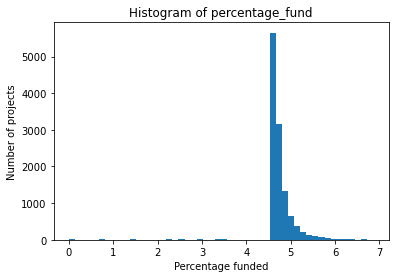

In [11]:
plt.hist(np.log(percentage_fund[percentage_fund != 0]),bins=50)
plt.xlabel('Percentage funded')
plt.ylabel('Number of projects')
plt.title('Histogram of percentage_fund')
plt.show()

#### 3.3 The average, median, standard deviation of funded, target

In [15]:
funded = pd.concat([s_projects['funded'],f_projects['funded']])
s_funded = s_projects['funded']
f_funded = f_projects['funded']
print('Mean of funded: {}'.format(funded.mean()))
print('Standard deviation of funded: {}'.format(funded.std()))
print('Max of funded: {}'.format(funded.max()))
print('Min of funded: {}'.format(funded.min()))
print('Median of funded: {}'.format(funded.median()))

Mean of funded: 6327.1797491486
Standard deviation of funded: 11416.380325185257
Max of funded: 444390.0
Min of funded: 0.0
Median of funded: 4320.0


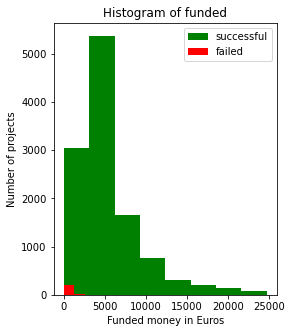

In [28]:
plt.figure(figsize=(4,5))
plt.hist(s_funded[s_funded <= 25000],color = 'green', label = 'successful', bins=8)
plt.hist(f_funded[f_funded <= 25000],color = 'red', label = 'failed', bins=8)
plt.xlabel('Funded money in Euros')
plt.ylabel('Number of projects')
plt.title('Histogram of funded')
plt.legend()
plt.show()

In [29]:
target = pd.concat([s_projects['target'],f_projects['target']])
s_target = s_projects['target']
f_target = f_projects['target']
print('Mean of target: {}'.format(target.mean()))
print('Standard deviation of target: {}'.format(target.std()))
print('Max of target: {}'.format(target.max()))
print('Min of target: {}'.format(target.min()))
print('Median of target: {}'.format(target.median()))

Mean of target: 5316.945178170944
Standard deviation of target: 8138.254335788316
Max of target: 360000.0
Min of target: 5.0
Median of target: 4000.0


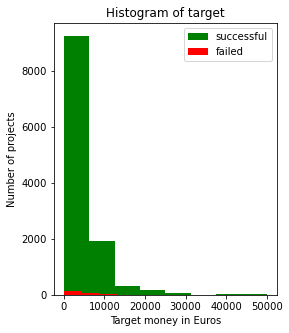

In [32]:
plt.figure(figsize=(4,5))
plt.hist(s_target[s_target <= 50000],color = 'green', label = 'successful', bins=8)
plt.hist(f_target[f_target <= 50000],color = 'red', label = 'failed', bins=8)
plt.xlabel('Target money in Euros')
plt.ylabel('Number of projects')
plt.title('Histogram of target')
plt.legend()
plt.show()

#### 3.4 The average, median, standard deviation of backers

In [34]:
backers = pd.concat([s_projects['backers'],f_projects['backers']])
print('Mean of backers: {}'.format(backers.mean()))
print('Standard deviation of backers: {}'.format(backers.std()))
print('Max of backers: {}'.format(backers.max()))
print('Min of backers: {}'.format(backers.min()))
print('Median of backers: {}'.format(backers.median()))

Mean of backers: 97.34927949061662
Standard deviation of backers: 205.6162643503152
Max of backers: 10266.0
Min of backers: 1.0
Median of backers: 66.0


D:\Anaconda\Install\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\Install\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


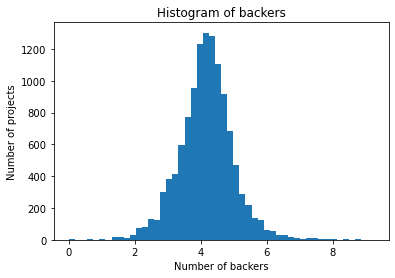

In [35]:
plt.figure()
plt.hist(np.log(backers),bins=50)
plt.xlabel('Number of backers')
plt.ylabel('Number of projects')
plt.title('Histogram of backers')
plt.show()

#### 3.5 The number of projects that have thumbnail is an jpeg, png, gif, or svg

In [36]:
thumbnail_type = pd.concat([s_projects['thumbnail_type'],f_projects['thumbnail_type']])
print('The number of projects with jpeg thumbnail: {}'.format(len(thumbnail_type[(thumbnail_type == 'jpg') | (thumbnail_type == 'jpg')])))
print('The number of projects with png thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'png'])))
print('The number of projects with gif thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'gif'])))
print('The number of projects with svg thumbnail: {}'.format(len(thumbnail_type[thumbnail_type == 'svg'])))


The number of projects with jpeg thumbnail: 8560
The number of projects with png thumbnail: 2582
The number of projects with gif thumbnail: 497
The number of projects with svg thumbnail: 1


#### 3.6 The average, median, standard deviation of the number of rewards

In [37]:
number_rewards = pd.concat([s_projects['number_rewards'],f_projects['number_rewards']])
print('Mean of number_rewards: {}'.format(number_rewards.mean()))
print('Standard deviation of number_rewards: {}'.format(number_rewards.std()))
print('Max of number_rewards: {}'.format(number_rewards.max()))
print('Min of number_rewards: {}'.format(number_rewards.min()))
print('Median of number_rewards: {}'.format(number_rewards.median()))

Mean of number_rewards: 8.560096353517734
Standard deviation of number_rewards: 4.15237948434103
Max of number_rewards: 143.0
Min of number_rewards: 0.0
Median of number_rewards: 8.0


#### 3.7 The average, median, standard deviation of the number of comments

In [38]:
num_comments = pd.concat([s_projects['num_comments'],f_projects['num_comments']])
print('Mean of num_comments: {}'.format(num_comments.mean()))
print('Standard deviation of num_comments: {}'.format(num_comments.std()))
print('Max of num_comments: {}'.format(num_comments.max()))
print('Min of num_comments: {}'.format(num_comments.min()))
print('Median of num_comments: {}'.format(num_comments.median()))

Mean of num_comments: 19.595398288894426
Standard deviation of num_comments: 50.22404711104708
Max of num_comments: 4394.0
Min of num_comments: 0.0
Median of num_comments: 13.0


#### 3.8 The number of words in each text, the most frequent words, the number of spelling errors

### 4. Analysis

#### 4.1 Tables

##### 4.1.1 Analyse data by years


In [39]:
by_year = pd.concat([s_projects,f_projects])[['percentage_fund','funded','backers','subcategory','end_date']]
years = []
for i, p in by_year.iterrows():
    try:
        num_cate = len(p['subcategory'].split(','))
    except:
        num_cate = 0
    years.append([
        p['end_date'].split('-')[0],
        p['percentage_fund'],
        p['funded'],
        p['backers'],
        num_cate
    ])
cols = ['year','percentage_fund','funded','backers','num_subcategories']
years_df = pd.DataFrame(years,columns=cols)



In [40]:
l_year = years_df['year'].drop_duplicates()
res_year = []
for _,y in l_year.iteritems():
    yi = years_df[years_df['year'] == y]
    res_year.append([
        y,
        len(yi),
        len(yi[yi['percentage_fund'] >= 100]),
        len(yi[yi['percentage_fund'] < 100]),
        len(yi[yi['num_subcategories'] > 0])
    ])
res_year_df = pd.DataFrame(res_year, columns=['year','num_projects','num_successful', 'num_failed','num_has_sub_cate'])
res_year_df = res_year_df.sort_values(by='year')
res_year_df

,year,num_projects,num_successful,num_failed,num_has_sub_cate
11,2010,11,11,0,0
10,2011,48,47,1,0
9,2012,156,153,3,0
8,2013,695,676,19,0
7,2014,1377,1346,31,2
6,2015,1462,1420,42,2
5,2016,1563,1546,17,1
4,2017,1359,1337,22,3
0,2018,1909,1865,44,5
1,2019,1833,1807,26,44


Text(0.5, 1.0, 'The change of number of projects over years, from 2010 to 2021')

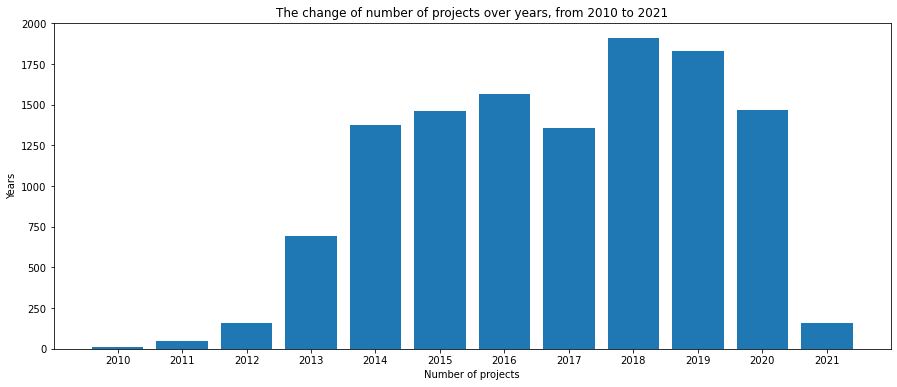

In [41]:
plt.figure(figsize=(15,6))
plt.bar(res_year_df['year'],res_year_df['num_projects'])
plt.xlabel('Number of projects')
plt.ylabel('Years')
plt.title('The change of number of projects over years, from 2010 to 2021')

Text(0.5, 1.0, 'The change of number of failed projects \n over years, from 2010 to 2021')

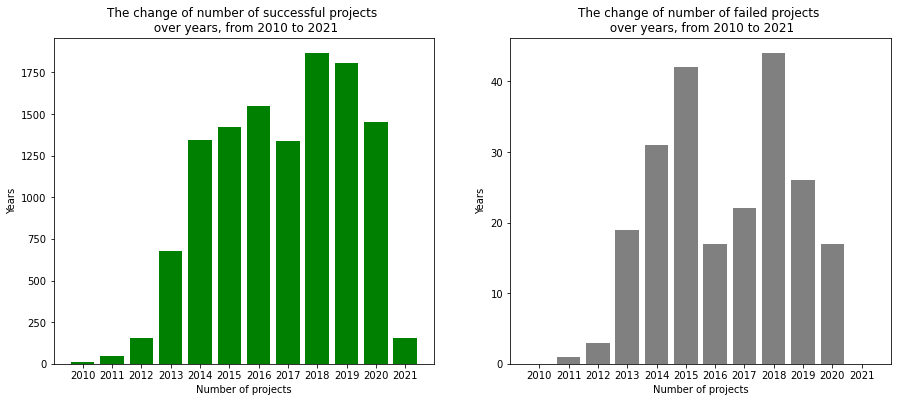

In [42]:
fig = plt.figure(figsize=(15,6))
fig1 = fig.add_subplot(1,2,1)
plt.bar(res_year_df['year'],res_year_df['num_successful'], color='green')
plt.xlabel('Number of projects')
plt.ylabel('Years')
plt.title('The change of number of successful projects \n over years, from 2010 to 2021')

fig2 = fig.add_subplot(1,2,2)
plt.bar(res_year_df['year'],res_year_df['num_failed'], color='gray')
plt.xlabel('Number of projects')
plt.ylabel('Years')
plt.title('The change of number of failed projects \n over years, from 2010 to 2021')

##### 4.1.2 The average number of comments, number of projects, average funded regarding the top 5 most popular language

In [43]:
by_lang = pd.concat([s_projects,f_projects])[['percentage_fund','funded','backers','num_comments','language']]
langs = by_lang['language'].drop_duplicates()
lang_count = []
for i,lang in langs.iteritems():
    lang_i = by_lang[by_lang['language'] == lang]
    lang_count.append([
        lang,
        len(lang_i),
        round(lang_i['percentage_fund'].mean(),3),
        round(lang_i['funded'].mean(),3),
        round(lang_i['backers'].mean(),3),
        round(lang_i['num_comments'].mean(),3)
    ])
    
lang_df = pd.DataFrame(lang_count, columns = ['language','num_projects','avg_percentage_fund','avg_funded','avg_backers','avg_comments'])
top5 = lang_df.sort_values(by='num_projects', ascending = False).head(5)
top5

,language,num_projects,avg_percentage_fund,avg_funded,avg_backers,avg_comments
0,fr,9564,120.076,5974.530,94.623,19.199
1,en,1915,120.703,8445.865,115.629,23.144
2,de,148,122.703,5319.574,75.276,13.351
4,hr,118,130.356,4370.356,71.362,13.212
3,fi,50,127.060,4315.300,90.500,16.040


In [44]:
lang_df.sort_values(by='num_projects', ascending = False)

,language,num_projects,avg_percentage_fund,avg_funded,avg_backers,avg_comments
0,fr,9564,120.076,5974.530,94.623,19.199
1,en,1915,120.703,8445.865,115.629,23.144
2,de,148,122.703,5319.574,75.276,13.351
4,hr,118,130.356,4370.356,71.362,13.212
3,fi,50,127.060,4315.300,90.500,16.040
8,nl,41,128.780,5465.756,66.195,9.683
7,ca,35,120.371,3836.486,61.429,10.429
5,it,25,136.520,6041.040,93.760,19.840
13,pt,21,130.762,3363.476,60.286,11.381
6,no,19,143.895,8495.474,140.474,21.632


##### 4.1.3 Comparing 2020 with other years, due to COVID 19:

#### 4.2 Graphs

##### 4.2.2 Bar chart, line: Total funded by year, a total of successful projects per year

##### 4.2.3 Bar chart: The number of backers per year

##### 4.2.4 Correlation map

In [37]:
pd.concat([s_projects,f_projects]).head(1)

,backers,creater_link,end_date,funded,language,max_price,min_price,num_comments,num_contributions,num_news,number_rewards,percentage_fund,pro_link,short_des,status,subcategory,target,thumbnail_type,title
0,244.0,https://www.kisskissbankbank.com/en/users/chic...,2018-12-06,13345.0,fr,10001.0,5.0,49.0,244.0,3.0,13.0,111.0,https://www.kisskissbankbank.com/en/projects/c...,"aidez, atteindre, 15, 000e, chiche, mobile, no...",Successful,NaN,12000.0,jpg,CHICHE se lance dans le pois chiche chocolaté !


##### Heat map of percentage fund and other nummeric variables

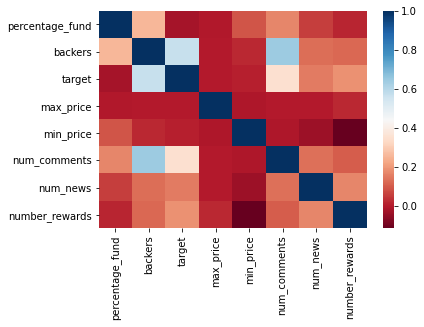

In [29]:
var_1 = ['percentage_fund','backers','target','max_price','min_price','num_comments','num_news','number_rewards']
pro_1 = pd.concat([s_projects,f_projects])[var_1]
corr_1 = pro_1.corr()
sns.heatmap(corr_1, xticklabels=corr_1.columns, yticklabels=corr_1.columns, cmap='RdBu')

##### Heat map between percentage fund and categorical variables

In [69]:
# Change into numeric value
def to_year(end_date):
    return int(end_date.split('-')[0])

def is_french(lang):
    if (lang == 'fr'):
        return 1
    return 0

def is_english(lang):
    if (lang == 'en'):
        return 1
    return 0

def has_category(subcategory):
    try:
        temp = subcategory[0]
        return 1
    except:
        return 0

def is_gif(thumbnail):
    if(thumbnail.lower() == 'gif'):
        return 1
    else:
        return 0
    
def len_title(title):
    return len(title)

def is_successful(status):
    if(status.lower() == 'successful'):
        return 1
    return 0

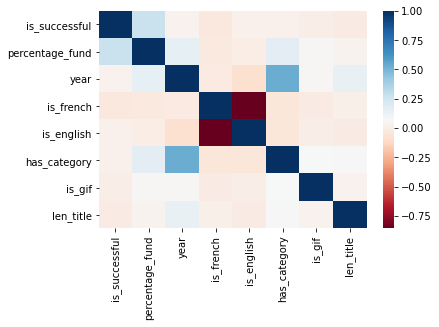

In [112]:
var_2 = ['percentage_fund','status','end_date','language','subcategory','thumbnail_type','title']
pro_2 = pd.concat([s_projects,f_projects])[var_2]

# Change into numeric data
pro_2_new = pd.DataFrame(columns=['is_successful', 'percentage_fund','year','is_french','is_english','has_category','is_gif','len_title'])
pro_2_new['is_successful'] = pro_2['status'].apply(lambda x: is_successful(x))
pro_2_new['percentage_fund'] = pro_2['percentage_fund']
pro_2_new['year'] = pro_2['end_date'].apply(lambda x: to_year(x))
pro_2_new['is_french'] = pro_2['language'].apply(lambda x: is_french(x))
pro_2_new['is_english'] = pro_2['language'].apply(lambda x: is_english(x))
pro_2_new['has_category'] = pro_2['subcategory'].apply(lambda x: has_category(x))
pro_2_new['is_gif'] = pro_2['thumbnail_type'].apply(lambda x: is_gif(x))
pro_2_new['len_title'] = pro_2['title'].apply(lambda x: len_title(x))


corr_2 = pro_2_new.corr()
sns.heatmap(corr_2, xticklabels=corr_2.columns, yticklabels=corr_2.columns, cmap='RdBu')


##### Heat map of percentage_fund and creater informations

In [101]:
creaters = pd.concat([s_creaters,f_creaters])
def get_num_created(creater_link):
    global creaters
    return creaters[creaters['creater_link'] == creater_link].iloc[0]['num_created']

def get_num_backed(creater_link):
    global creaters
    return creaters[creaters['creater_link'] == creater_link].iloc[0]['num_backed']

def get_num_followed(creater_link):
    global creaters
    return creaters[creaters['creater_link'] == creater_link].iloc[0]['num_followed']

In [103]:
var_3 = ['pro_link','percentage_fund','status','creater_link']
pro_3 = pd.concat([s_projects,f_projects])[var_3]

pro_3_new = pd.DataFrame(columns=['percentage_fund', 'is_successful', 'num_created', 'num_backed', 'num_followed'])
pro_3_new['percentage_fund'] = pro_3['percentage_fund']
pro_3_new['is_successful'] = pro_3['status'].apply(lambda x: is_successful(x))
pro_3_new['num_created'] = pro_3['creater_link'].apply(lambda x: get_num_created(x))
pro_3_new['num_backed'] = pro_3['creater_link'].apply(lambda x: get_num_backed(x))
pro_3_new['num_followed'] = pro_3['creater_link'].apply(lambda x: get_num_followed(x))
pro_3_new

,percentage_fund,is_successful,num_created,num_backed,num_followed
0,111.0,1,1.0,1.0,0.0
1,101.0,1,1.0,1.0,1.0
2,237.0,1,2.0,2.0,0.0
3,128.0,1,1.0,0.0,0.0
4,137.0,1,1.0,1.0,0.0
...,...,...,...,...,...
233,0.0,0,1.0,0.0,0.0
234,1.0,0,1.0,0.0,0.0
235,52.0,0,1.0,1.0,0.0
236,32.0,0,1.0,0.0,0.0


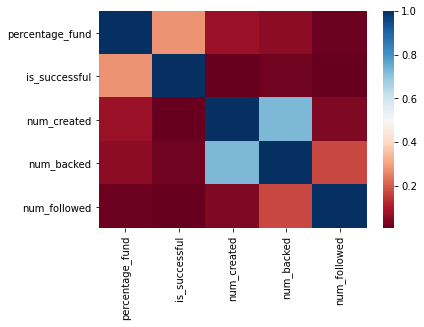

In [104]:
corr_3 = pro_3_new.corr()
sns.heatmap(corr_3, xticklabels=corr_3.columns, yticklabels=corr_3.columns, cmap='RdBu')

##### Heat map for rewards

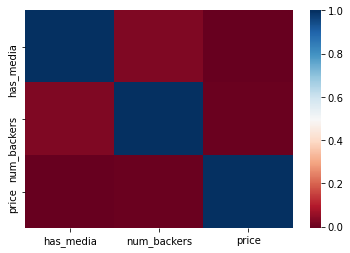

In [108]:
def has_media_int(has_media):
    if has_media:
        return 1
    return 0
rewards = pd.concat([s_rewards,f_rewards])
reward_1 = rewards.drop(columns=['Unnamed: 0.1.1.1', 'pro_link'])
reward_1['has_media'] = reward_1['has_media'].apply(lambda x: has_media_int(x))
corr_4 = reward_1.corr()
sns.heatmap(corr_4, xticklabels=corr_4.columns, yticklabels=corr_4.columns, cmap='RdBu')

#### 4.3 Linear Regression

##### 4.3.1 y = percentage_fund, x = has_category, year

In [120]:
X1 = np.column_stack((np.ones(pro_2_new.shape[0]),pro_2_new[['year', 'has_category']]))
y1 = pro_2_new['percentage_fund']
res1 = sm.OLS(y1,X1).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:        percentage_fund   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           4.01e-95
Time:                        00:35:47   Log-Likelihood:                -64612.
No. Observations:               12039   AIC:                         1.292e+05
Df Residuals:                   12036   BIC:                         1.293e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4179.4782    497.602     -8.399      0.0

##### 4.3.2 y = percentage, x = the remaining features, except: pro_link, title, percentage_fund, end_date, num_contributions, and creater_link


In [124]:
X2 = np.column_stack((np.ones(pro_1.shape[0]),pro_1[['target','max_price','min_price','num_comments','num_news','number_rewards']]))
y2 = pro_1['percentage_fund']
res2 = sm.OLS(y2,X2).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percentage_fund   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          1.08e-124
Time:                        00:42:51   Log-Likelihood:                -64533.
No. Observations:               12039   AIC:                         1.291e+05
Df Residuals:                   12032   BIC:                         1.291e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.8172      1.214     92.128      0.000     109.438     114.196
x1            -0.0007   6.27e-05    -10.590      0.000      -0.001      -0.001
x2          -1.02e-08    3.6e-08     -0.283      0.777   -8.07e-08    6.03e-08
x3             0.6486      0.059     11.009      0.000       0.533       0.764
x4             0.2082      0.010     20.762      0.000       0.189       0.228
x5             0.4093      0.077      5.292      0.000       0.258       0.561
x6             0.2270      0.117      1.937      0.053      -0.003       0.457
==============================================================================
Omnibus:                    14024.859   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2336757.815
Skew:                           5.991   Prob(JB):                         0.00
Kurtosis:                      70.192   Cond. No.                     3.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 4.3.3 y = num_backers, x = all features

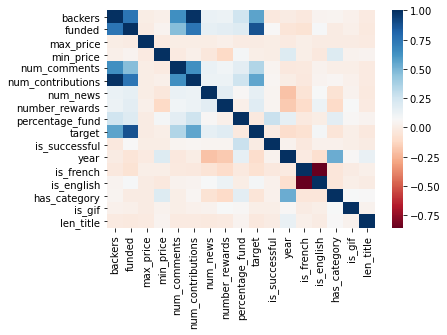

In [126]:
pro_all = pd.concat([s_projects,f_projects])
pro_all['is_successful'] = pro_all['status'].apply(lambda x: is_successful(x))
pro_all['percentage_fund'] = pro_all['percentage_fund']
pro_all['year'] = pro_all['end_date'].apply(lambda x: to_year(x))
pro_all['is_french'] = pro_all['language'].apply(lambda x: is_french(x))
pro_all['is_english'] = pro_all['language'].apply(lambda x: is_english(x))
pro_all['has_category'] = pro_all['subcategory'].apply(lambda x: has_category(x))
pro_all['is_gif'] = pro_all['thumbnail_type'].apply(lambda x: is_gif(x))
pro_all['len_title'] = pro_all['title'].apply(lambda x: len_title(x))

corr_all = pro_all.corr()
sns.heatmap(corr_all, xticklabels=corr_all.columns, yticklabels=corr_all.columns, cmap='RdBu')

In [129]:
var_all = [
    'max_price',
    'min_price',
    'num_contributions',
    'num_news',
    'num_comments',
    'number_rewards',
    'target',
    'year',
    'is_french',
    'is_english',
    'has_category',
    'is_gif',
    'len_title'
]
X3 = np.column_stack((np.ones(pro_all.shape[0]),pro_all[var_all]))
y3 = pro_all['percentage_fund']
res3 = sm.OLS(y3,X3).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percentage_fund   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     159.1
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:55:54   Log-Likelihood:                -63874.
No. Observations:               12039   AIC:                         1.278e+05
Df Residuals:                   12025   BIC:                         1.279e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4345.0378    490.606     -8.856      0.000   -5306.706   -3383.370
x1          -9.08e-09   3.41e-08     -0.266      0.790   -7.59e-08    5.77e-08
x2             0.3643      0.057      6.373      0.000       0.252       0.476
x3             0.0932      0.003     30.524      0.000       0.087       0.099
x4             0.5530      0.075      7.418      0.000       0.407       0.699
x5            -0.0014      0.012     -0.124      0.902      -0.024       0.021
x6             0.3856      0.113      3.423      0.001       0.165       0.606
x7            -0.0015   6.71e-05    -22.931      0.000      -0.002      -0.001
x8             2.2081      0.243      9.079      0.000       1.731       2.685
x9            -0.2962      2.155     -0.137      0.891      -4.521       3.929
x10            1.1954      2.392      0.500      0.617      -3.492       5.883
x11           13.1535      1.613      8.155      0.000       9.992      16.315
x12            8.9371      2.254      3.966      0.000       4.520      13.355
x13            0.0428      0.024      1.769      0.077      -0.005       0.090
==============================================================================
Omnibus:                    13518.566   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2382586.722
Skew:                           5.566   Prob(JB):                         0.00
Kurtosis:                      71.013   Cond. No.                     1.44e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 4.3.4 y = percentage_fund, x = num_created, num_backed, num_follwed